--- Building WL Tree (Convergence Mode: True) ---
-> Stable convergence reached at iteration 4.

--- Validation des Résultats ---
Similar to 5 (delta=0): [6]
Similar to 5 (delta=2): [1, 6]
Similar to 5 (delta=4): [1, 2, 3, 4, 6, 7, 8]
Similar to 2 (delta=0): [8]
Similar to 1 (delta=0): []
Similar to 3 (delta=3): []

Score Similarité (1 vs 5): 0.50


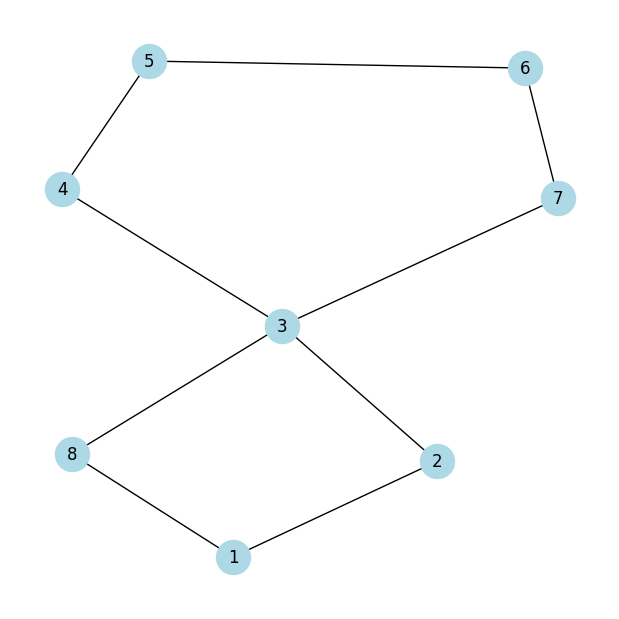

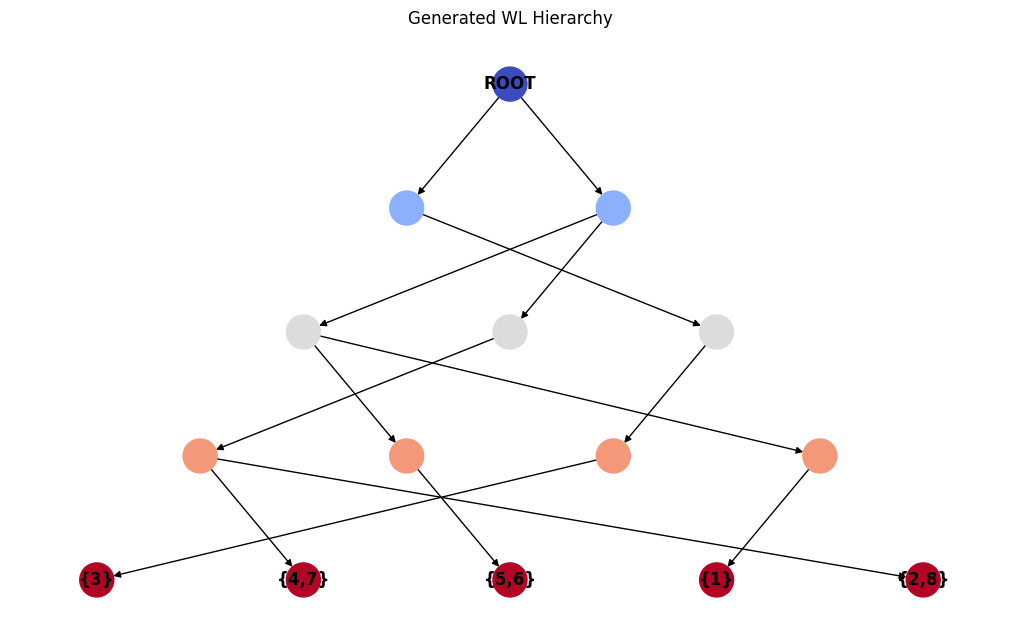

In [1]:
import networkx as nx
from wl import *
import matplotlib.pyplot as plt
# Graph exact du papier (Fig 1a)
# Attention: Les degrés sont v1(2), v2(2), v8(2), v3(4), v4(2), v7(2), v5(2), v6(2)
# Les arêtes doivent être exactes pour reproduire l'arbre.
nodes = [1, 2, 3, 4, 5, 6, 7, 8]
edges = [
    (1, 2), (1, 8), (2, 3), (8, 3), 
    (3, 4), (3, 7), (4, 5), (7, 6), (5, 6)
]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, seed=42)   # placement lisible et stable
nx.draw(G, pos, with_labels=True, node_size=600, node_color="lightblue")

engine = WLHierarchyEngine(nodes, edges)
# On force la convergence pour avoir la profondeur max (comme le papier)
engine.build_wl_tree(force_convergence=True)

print("\n--- Validation des Résultats ---")

# TEST 1: Node 5 (Bout de la boucle droite)
# Delta 0: Identité parfaite -> [6]
print(f"Similar to 5 (delta=0): {engine.get_similar_nodes(5, delta=0)}")

# Delta 2: Frères (Même parent direct). 
# Dans l'arbre profond du papier, 5 et 6 sont isolés dans leur feuille commune ou parent commun.
# Ils n'ont pas de frères proches car 1 est un Cousin.
print(f"Similar to 5 (delta=2): {engine.get_similar_nodes(5, delta=2)}")

# Delta 4: Cousins (Même Grand-Parent).
# Ici on remonte assez haut pour voir la branche de gauche (Node 1).
print(f"Similar to 5 (delta=4): {engine.get_similar_nodes(5, delta=4)}")

# TEST 2: Node 2 (Connecteur gauche)
print(f"Similar to 2 (delta=0): {engine.get_similar_nodes(2, delta=0)}")

# TEST 3: Node 1 (Bout gauche)
# Il est unique structurellement à la fin (connecté au diamant vs cycle)
print(f"Similar to 1 (delta=0): {engine.get_similar_nodes(1, delta=0)}")

# TEST 4: Node 3 (Centre)
# Unique dès le début (Degré 4)
print(f"Similar to 3 (delta=3): {engine.get_similar_nodes(3, delta=3)}")

# Score de similarité structurelle (1 et 5 sont des 'Hard Positives')
score = engine.get_structural_similarity(1, 5)
print(f"\nScore Similarité (1 vs 5): {score:.2f}")

engine.visualize_hierarchy()


In [2]:
import torch
x = torch.ones((len(nodes), 1), dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

mapping = {node: i for i, node in enumerate(nodes)}
remapped_edges = [(mapping[u], mapping[v]) for u, v in edges]

edge_index = torch.tensor(remapped_edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

C:\Users\Z\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [6]:
from gin_encoder import GINEncoder

encoder = GINEncoder(input_dim=1, hidden_dim=32, output_dim=16, num_layers=3)



In [7]:
import torch.nn.functional as F
with torch.no_grad():
    embeddings = encoder(x, edge_index)

print(f"Shape des features X : {x.shape}")
print(f"Shape de Edge Index : {edge_index.shape}")
print(f"Shape des Embeddings de sortie : {embeddings.shape}")

print("\n--- Exemple de résultats (Avant entrainement) ---")
print(f"Embedding du noeud 1 (Index 0) :\n{embeddings[0][:5]}...") 
print(f"Embedding du noeud 2 (Index 1) :\n{embeddings[1][:5]}...")

sim_2_8 = F.cosine_similarity(embeddings[1].unsqueeze(0), embeddings[7].unsqueeze(0))
print(f"\nSimilarité Cosine entre Noeud 2 et Noeud 8 (Structurellement identiques) : {sim_2_8.item():.4f}")

Shape des features X : torch.Size([8, 1])
Shape de Edge Index : torch.Size([2, 18])
Shape des Embeddings de sortie : torch.Size([8, 16])

--- Exemple de résultats (Avant entrainement) ---
Embedding du noeud 1 (Index 0) :
tensor([-0.2296, -0.3400,  0.3378,  0.0367, -0.1292])...
Embedding du noeud 2 (Index 1) :
tensor([ 0.0706, -0.2344, -0.5389, -0.3824,  0.0886])...

Similarité Cosine entre Noeud 2 et Noeud 8 (Structurellement identiques) : 1.0000


--- Building WL Tree (Convergence Mode: True) ---
-> Stable convergence reached at iteration 4.
--- Démarrage de l'entrainement sur 150 époques ---
Epoch 10/150 | Loss: 4.7505
Epoch 20/150 | Loss: 5.1603
Epoch 30/150 | Loss: 4.9052
Epoch 40/150 | Loss: 4.8113
Epoch 50/150 | Loss: 1.1980
Epoch 60/150 | Loss: 0.0000
Epoch 70/150 | Loss: 1.1297
Epoch 80/150 | Loss: 0.0000
Epoch 90/150 | Loss: 0.0000
Epoch 100/150 | Loss: 0.0000
Epoch 110/150 | Loss: 0.0000
Epoch 120/150 | Loss: 0.0000
Epoch 130/150 | Loss: 0.0000
Epoch 140/150 | Loss: 0.0000
Epoch 150/150 | Loss: 0.0000


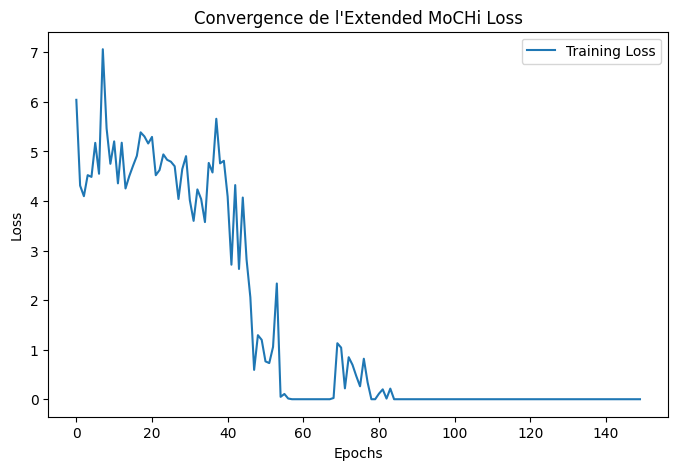


Similarité finale entre Node 1 et Node 5 : 0.3686


In [20]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from wl import WLHierarchyEngine
from gin_encoder import GINEncoder
from graph_augmentor import GraphAugmentor
from dual_view_miner import DualViewMiner
from loss import ExtendedMoCHILoss

# ==========================================
# 1. SETUP & DATA
# ==========================================
nodes = [0, 1, 2, 3, 4, 5, 6, 7]
edges = [(0, 1), (0, 7), (1, 2), (7, 2), (2, 3), (2, 6), (3, 4), (6, 5), (4, 5)]

x = torch.eye(8) 
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

# ==========================================
# 2. INITIALIZE MODULES
# ==========================================
wl_engine = WLHierarchyEngine(nodes, edges)
wl_engine.build_wl_tree(force_convergence=True)

encoder = GINEncoder(input_dim=8, hidden_dim=32, output_dim=16)
optimizer = optim.Adam(encoder.parameters(), lr=0.01)

augmentor = GraphAugmentor(edge_drop_prob=0.2, feature_mask_prob=0.2)
miner = DualViewMiner(wl_engine, nodes, theta=0.5, delta=2)
criterion = ExtendedMoCHILoss(temperature=0.1, num_negatives=128)

# ==========================================
# 3. TRAINING LOOP
# ==========================================
encoder.train()

losses = [] # Pour tracer la courbe après
total_epochs = 150

print(f"--- Démarrage de l'entrainement sur {total_epochs} époques ---")

for epoch in range(total_epochs):
    # [IMPORTANT] Remise à zéro des gradients au début de CHAQUE tour
    optimizer.zero_grad() 

    # --- Step 1: Dynamic Mining (Mise à jour des candidats) ---
    # On le fait à chaque époque pour suivre l'évolution de l'encodeur
    # (Note: Sur des gros graphes, on le fait toutes les 5 ou 10 époques pour gagner du temps)
    with torch.no_grad():
        h_clean = encoder(x, edge_index)
        ext_pos_lists, hard_neg_lists = miner.mine_candidates(h_clean)

    # --- Step 2: Augmentations ---
    x1, edge_index1 = augmentor.augment(x, edge_index)
    x2, edge_index2 = augmentor.augment(x, edge_index)

    # --- Step 3: Forward Pass ---
    z1 = encoder(x1, edge_index1)
    z2 = encoder(x2, edge_index2)

    total_loss = 0

    # --- Step 4: Loss Calculation per Anchor ---
    for i in range(len(nodes)):
        anchor = z1[i].unsqueeze(0)
        
        # A. Positives (Vue 2 + Intersection Mining)
        pos_view2 = z2[i].unsqueeze(0)
        mined_pos_indices = ext_pos_lists[i]
        
        if len(mined_pos_indices) > 0:
            pos_extended = z2[mined_pos_indices]
            all_positives = torch.cat([pos_view2, pos_extended], dim=0)
        else:
            all_positives = pos_view2

        # B. Hard Negatives (XOR Mining)
        hard_neg_indices = hard_neg_lists[i]
        
        if len(hard_neg_indices) > 0:
            hard_negatives = z2[hard_neg_indices]
        else:
            hard_negatives = torch.tensor([]).to(x.device)

        # C. Compute Loss
        loss_i = criterion(anchor, all_positives, hard_negatives)
        total_loss += loss_i

    # Moyenne sur le batch
    final_loss = total_loss / len(nodes)
    
    # Backpropagation
    final_loss.backward()
    optimizer.step()
    
    losses.append(final_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{total_epochs} | Loss: {final_loss.item():.4f}")

# ==========================================
# 4. VISUALISATION DE LA LOSS
# ==========================================
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence de l'Extended MoCHi Loss")
plt.legend()
plt.show()

# Petit check final de similarité
encoder.eval()
with torch.no_grad():
    final_h = encoder(x, edge_index)
    # Vérifions si 1 et 5 (Frères WL mais distants géométriquement) se sont rapprochés
    # Indices : node 1 -> idx 1, node 5 -> idx 5
    sim = torch.nn.functional.cosine_similarity(final_h[1].unsqueeze(0), final_h[5].unsqueeze(0))
    print(f"\nSimilarité finale entre Node 1 et Node 5 : {sim.item():.4f}")

## CORA

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import copy

from wl import WLHierarchyEngine
from gin_encoder import GINEncoder
from graph_augmentor import GraphAugmentor
from dual_view_miner import DualViewMiner
from loss import ExtendedMoCHILoss
from dataset_cora import load_cora_raw, create_masks


DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

PRETRAIN_EPOCHS = 200
LR_PRETRAIN = 0.0005  
WEIGHT_DECAY = 1e-5

# Architecture GNN
HIDDEN_DIM = 512
OUT_DIM = 256

# Hyperparamètres GCL
MINING_INTERVAL = 10  # Recalculer les voisins tous les X epochs
THETA_MINER = 0.6     # Seuil de similarité feature
DELTA_WL = 2          # Seuil de distance structurelle
TEMP_LOSS = 0.2       # Temperature (0.2 est standard pour Cora)
NUM_NEGS = 256        # Beaucoup de négatifs pour bien sculpter l'espace

# ==========================================
# HELPER: EVALUATION RAPIDE
# ==========================================
def test_accuracy(encoder, data):
    """Entraine une régression logistique temporaire pour évaluer la qualité."""
    encoder.eval()
    with torch.no_grad():
        z = encoder(data.x, data.edge_index)
    
    classifier = nn.Linear(z.shape[1], data.num_classes).to(DEVICE)
    opt = optim.Adam(classifier.parameters(), lr=0.01, weight_decay=5e-4)
    loss_fn = nn.CrossEntropyLoss()
    
    # Train classifier (100 epochs fast)
    z = z.detach()
    for _ in range(100):
        opt.zero_grad()
        logits = classifier(z)
        loss = loss_fn(logits[data.train_mask], data.y[data.train_mask])
        loss.backward()
        opt.step()
        
    # Eval
    with torch.no_grad():
        preds = classifier(z).argmax(dim=1)
        acc = preds[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    
    encoder.train() # Remettre en mode train
    return acc

# ==========================================
# 1. SETUP
# ==========================================
print("--- Loading Data ---")
data, num_nodes, input_dim = load_cora_raw("./cora")
data = create_masks(data).to(DEVICE)

nodes_list = list(range(num_nodes))
edges_list = data.edge_index.t().tolist()

# ==========================================
# 2. INIT MODULES
# ==========================================
print("\n[1/4] WL Engine...")
wl_engine = WLHierarchyEngine(nodes_list, edges_list)
wl_engine.build_wl_tree(max_iterations=4)

print("[2/4] Models & Miner...")
encoder = GINEncoder(input_dim=input_dim, hidden_dim=HIDDEN_DIM, output_dim=OUT_DIM).to(DEVICE)
optimizer = optim.Adam(encoder.parameters(), lr=LR_PRETRAIN, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=PRETRAIN_EPOCHS, eta_min=1e-5)


augmentor = GraphAugmentor(edge_drop_prob=0.25, feature_mask_prob=0.25)
miner = DualViewMiner(wl_engine, nodes_list, theta=THETA_MINER, delta=DELTA_WL)
criterion = ExtendedMoCHILoss(temperature=TEMP_LOSS, num_negatives=NUM_NEGS)

# ==========================================
# 3. TRAINING LOOP (Avec Best Model Saving)
# ==========================================
print(f"\n[3/4] Pre-training ({PRETRAIN_EPOCHS} epochs)...")
encoder.train()

best_acc = 0.0
best_model_state = None

# Initialisation des listes (pour le premier tour)
ext_pos_lists, hard_neg_lists = [], []

for epoch in range(PRETRAIN_EPOCHS):
    optimizer.zero_grad()
    
    # A. Dynamic Mining (Pas à chaque tour, c'est trop instable/lent)
    if epoch % MINING_INTERVAL == 0:
        with torch.no_grad():
            encoder.eval()
            h_clean = encoder(data.x, data.edge_index)
            ext_pos_lists, hard_neg_lists = miner.mine_candidates(h_clean)
            encoder.train()

    # B. Augmentations
    x1, edge_index1 = augmentor.augment(data.x, data.edge_index)
    x2, edge_index2 = augmentor.augment(data.x, data.edge_index)
    
    # C. Forward
    z1 = encoder(x1, edge_index1)
    z2 = encoder(x2, edge_index2)
    
    total_loss = 0
    
    # Batching aléatoire pour la vitesse et la stochasticité
    batch_size = 512
    batch_indices = torch.randperm(num_nodes)[:batch_size]
    
    for idx in batch_indices:
        i = idx.item()
        anchor = z1[i].unsqueeze(0)
        
        # Positives
        pos_view2 = z2[i].unsqueeze(0)
        
        # Protection si le miner n'a pas encore tourné (epoch 0)
        if len(ext_pos_lists) > 0:
            mined_indices = ext_pos_lists[i]
            # Limiter le nombre de positifs étendus (bruit) -> Max 5
            if len(mined_indices) > 5:
                import random
                mined_indices = random.sample(mined_indices, 5)
                
            if len(mined_indices) > 0:
                pos_extended = z2[mined_indices]
                all_positives = torch.cat([pos_view2, pos_extended], dim=0)
            else:
                all_positives = pos_view2
        else:
            all_positives = pos_view2
            
        # Negatives
        if len(hard_neg_lists) > 0:
            hard_indices = hard_neg_lists[i]
            # Limiter les hard negatives -> Max 20
            if len(hard_indices) > 20:
                import random
                hard_indices = random.sample(hard_indices, 20)
            
            if len(hard_indices) > 0:
                hard_negatives = z2[hard_indices]
            else:
                hard_negatives = torch.tensor([]).to(DEVICE)
        else:
            hard_negatives = torch.tensor([]).to(DEVICE)
            
        loss_i = criterion(anchor, all_positives, hard_negatives)
        total_loss += loss_i
        
    final_loss = total_loss / len(batch_indices)
    final_loss.backward()
    optimizer.step()
    scheduler.step()
    
    # --- D. MONITORING & SAVE ---
    if (epoch + 1) % 10 == 0:
        # On teste la qualité réelle des embeddings
        current_acc = test_accuracy(encoder, data)
        print(f"Epoch {epoch+1:03d} | Loss: {final_loss.item():.4f} | Val Acc: {current_acc:.4f}")
        
        # On sauvegarde si c'est le meilleur
        if current_acc > best_acc:
            best_acc = current_acc
            best_model_state = copy.deepcopy(encoder.state_dict())

print(f"\n[Training Finished] Best Validation Accuracy found: {best_acc:.4f}")

# ==========================================
# 4. ÉVALUATION FINALE (Sur le meilleur modèle)
# ==========================================
print("\n[4/4] Final Evaluation with Best Model...")

# Charger les meilleurs poids
if best_model_state is not None:
    encoder.load_state_dict(best_model_state)

encoder.eval()
with torch.no_grad():
    final_embeddings = encoder(data.x, data.edge_index).detach()

# Linear Probing Final (Plus long: 200 epochs)
classifier = nn.Linear(OUT_DIM, data.num_classes).to(DEVICE)
clf_optimizer = optim.Adam(classifier.parameters(), lr=0.01, weight_decay=5e-4)
criterion_cls = nn.CrossEntropyLoss()

for epoch in range(200):
    classifier.train()
    clf_optimizer.zero_grad()
    logits = classifier(final_embeddings)
    loss = criterion_cls(logits[data.train_mask], data.y[data.train_mask])
    loss.backward()
    clf_optimizer.step()

classifier.eval()
logits = classifier(final_embeddings)
preds = logits.argmax(dim=1)
acc = preds[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()

print("-" * 30)
print(f"FINAL ACCURACY ON CORA: {acc:.4f}")
print("-" * 30)

--- Loading Data ---
--- Loading Cora Dataset from raw files ---
Reading ./cora\cora.content...
Nodes: 2708, Feature Dim: 1433, Classes: 7
Reading ./cora\cora.cites...
Split: Train 272, Val 270, Test 2166

[1/4] WL Engine...
--- Building WL Tree (Convergence Mode: False) ---
[2/4] Models & Miner...

[3/4] Pre-training (200 epochs)...
Epoch 010 | Loss: 4.4876 | Val Acc: 0.7308
Epoch 020 | Loss: 5.2699 | Val Acc: 0.7548
Epoch 030 | Loss: 5.2711 | Val Acc: 0.7415
Epoch 040 | Loss: 5.2682 | Val Acc: 0.7364
Epoch 050 | Loss: 5.3548 | Val Acc: 0.7244
Epoch 060 | Loss: 5.2823 | Val Acc: 0.7138
Epoch 070 | Loss: 5.2718 | Val Acc: 0.6971
Epoch 080 | Loss: 5.2508 | Val Acc: 0.6685
Epoch 090 | Loss: 5.2694 | Val Acc: 0.6708
Epoch 100 | Loss: 5.2693 | Val Acc: 0.6902
Epoch 110 | Loss: 5.3193 | Val Acc: 0.6796
Epoch 120 | Loss: 5.3076 | Val Acc: 0.6487
Epoch 130 | Loss: 5.3410 | Val Acc: 0.6528
Epoch 140 | Loss: 5.3155 | Val Acc: 0.6588
Epoch 150 | Loss: 5.3121 | Val Acc: 0.6570
Epoch 160 | Loss: 5